# Ahmad Ryan : $22i-0781$ : Lab 12 : Artificial Intellegence Lab

# **Lab Task: Build K‑Nearest Neighbors (KNN) Classifier from Scratch**

## **Objective :**
- Implement the KNN classification algorithm in Python without using scikit‑learn’s KNeighborsClassifier.

- Practice data loading, cleaning, feature scaling, and train/test splitting.

- Evaluate your classifier’s performance using accuracy, precision, recall, and a confusion matrix.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

## **1. Data loading**


In [4]:
data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## **2. Data Preprocessing**

- **Identify missing values**
- **Handle missing data (choose one)**
- **Feature scaling**
- **Train/Test split**: Split into 70% train / 30% test (use random_state=42).

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1).values)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df['target'].values, test_size=0.3, random_state=42)

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## **Implement KNN Class**

In [7]:
class ScratchKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        preds = []
        for x in X:
            # Euclidean distance
            dists = np.linalg.norm(self.X_train - x, axis=1)
            # Find k nearest
            idx = np.argsort(dists)[:self.k]
            votes = self.y_train[idx]
            # display majority vote
            pred = np.bincount(votes).argmax()
            preds.append(pred)
        return np.array(preds)



## **Evaluate the model**


Fine the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report


Training & Prediction Time (k=5): 0.0093 seconds

Accuracy : 0.9591
Precision: 0.9633
Recall   : 0.9722
F1 Score : 0.9677


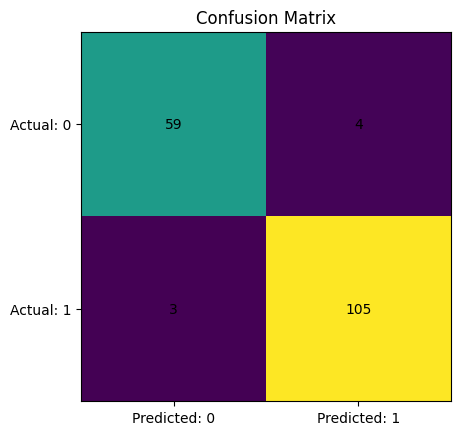


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
# Evaluate for k=5
knn = ScratchKNN(k=5)
start_time = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
elapsed = time.time() - start_time
print(f"\nTraining & Prediction Time (k=5): {elapsed:.4f} seconds")

# Performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
ax.imshow(cm)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted: 0', 'Predicted: 1'])
ax.set_yticklabels(['Actual: 0', 'Actual: 1'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center')
ax.set_title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

## **Effect of k on Classification Accuracy**

- For each k from 3 to 29, fit your k‑NN on the training set and record test accuracy.

- Plot k (on the x‑axis) vs. accuracy (on the y‑axis), with markers and clear labels.

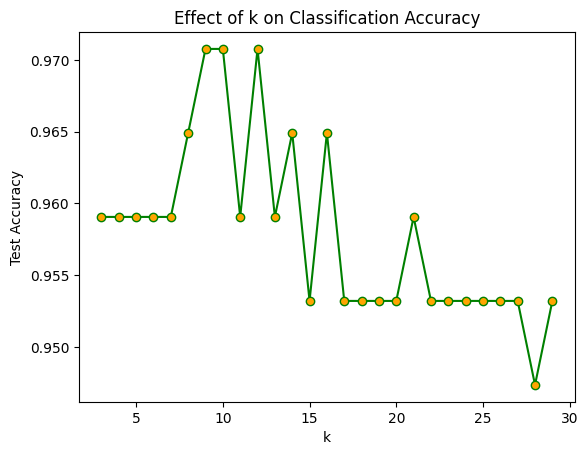

In [12]:

k_values = list(range(3, 30))
accuracies = []
for k in k_values:
    model = ScratchKNN(k=k)
    model.fit(X_train, y_train)
    preds_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds_k))

# Plotting k vs. accuracy
plt.figure()
plt.plot(k_values, accuracies, marker='o', color='green', markerfacecolor='orange')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.title('Effect of k on Classification Accuracy')
plt.show()